<a href="https://colab.research.google.com/github/nagaditya39/LeNet5-CIFAR10-Visualizer/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
196/196 [==============================] - 29s 142ms/step - loss: 1.8645 - accuracy: 0.3199 - val_loss: 1.6035 - val_accuracy: 0.4264
Epoch 2/20
196/196 [==============================] - 27s 140ms/step - loss: 1.5290 - accuracy: 0.4499 - val_loss: 1.4789 - val_accuracy: 0.4747
Epoch 3/20
196/196 [==============================] - 29s 146ms/step - loss: 1.4203 - accuracy: 0.4915 - val_loss: 1.3819 - val_accuracy: 0.5024
Epoch 4/20
196/196 [==============================] - 29s 149ms/step - loss: 1.3515 - accuracy: 0.5191 - val_loss: 1.3634 - val_accuracy: 0.5105
Epoch 5/20
196/196 [==============================] - 28s 142ms/step - loss: 1.2839 - accuracy: 0.5464 - val_loss: 1.3205 - val_accuracy: 0.5266
Epoch 6/20
196/196 [==============================] - 28s 142ms/step - loss: 1.2346 - accuracy: 0.5625 - val_loss: 1.2439 - val_accuracy: 0.5494
Epoch 7/20
196/196 [==============================] - 28s 142ms/step - loss: 1.1896 - accuracy: 0.5812 - val_loss: 1.2483 - val_ac

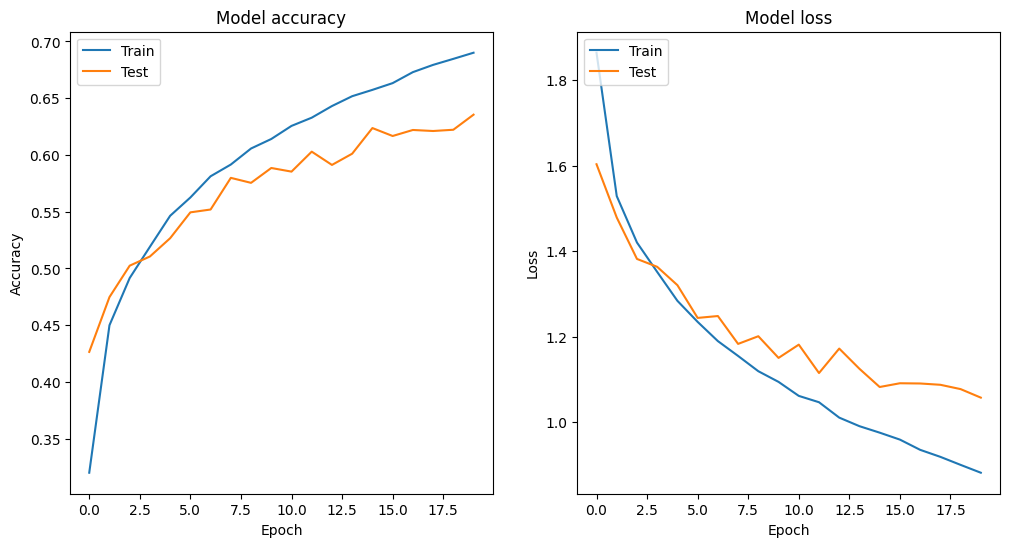

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalizing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# model arch definition
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train
history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_data=(x_test, y_test))

# visualize
plt.figure(figsize=(12, 6))

# plot labels and values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
